In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Larry\AppData\Local\Temp\ipykernel_14664\1473379992.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Property Type', y='Market Price', data=df, estimator='mean', ci=None)


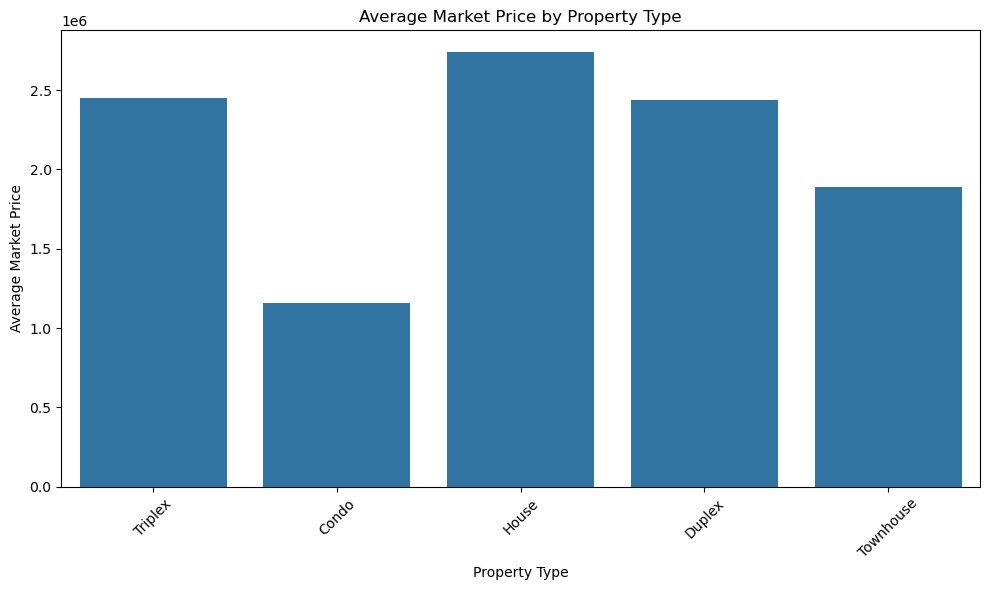

In [4]:
# Load the dataset
df = pd.read_csv("../cleaned_data/cleaned_house_price20.csv")

# Convert Market Price to numeric
df['Market Price'] = pd.to_numeric(df['Market Price'], errors='coerce')

# Create a barplot of average market price by property type
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Type', y='Market Price', data=df, estimator='mean', ci=None)

plt.title("Average Market Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Market Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

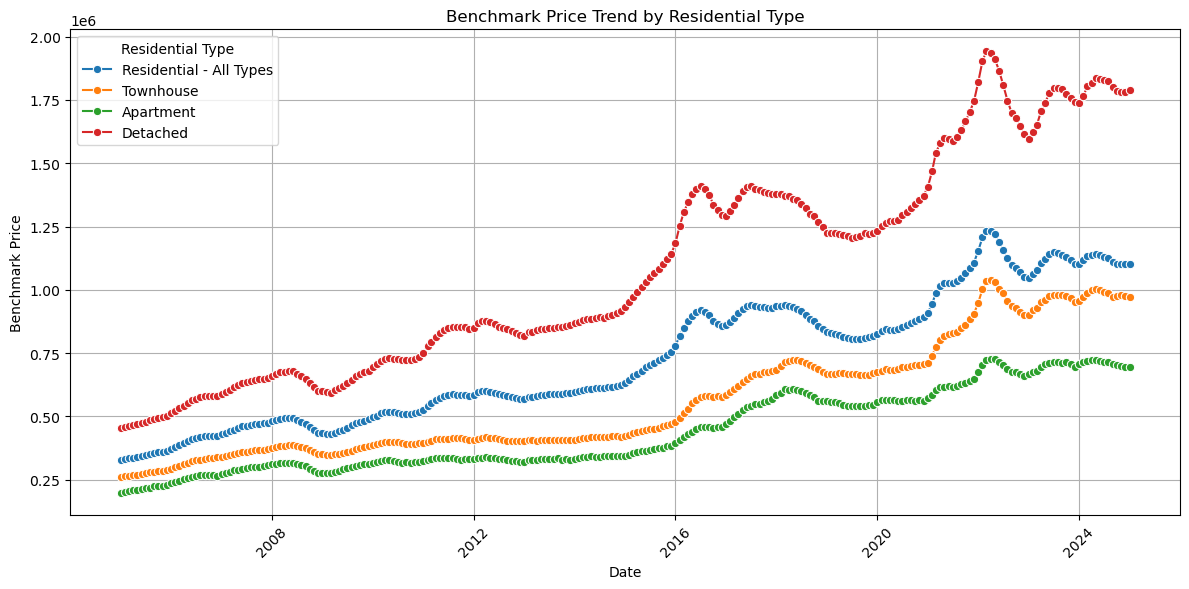

In [6]:
# Load dataset
df = pd.read_csv("../cleaned_data/cleaned_lower_mainland_property_data.csv")  # replace with actual file name

# Clean the 'Benchmark' column (remove $ and commas, convert to float)
df['Benchmark'] = df['Benchmark'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' to datetime for sorting and plotting
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Sort by Date just in case
df = df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Benchmark', hue='Residential Type', marker='o')

plt.title("Benchmark Price Trend by Residential Type")
plt.xlabel("Date")
plt.ylabel("Benchmark Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Residential Type")
plt.grid(True)
plt.show()

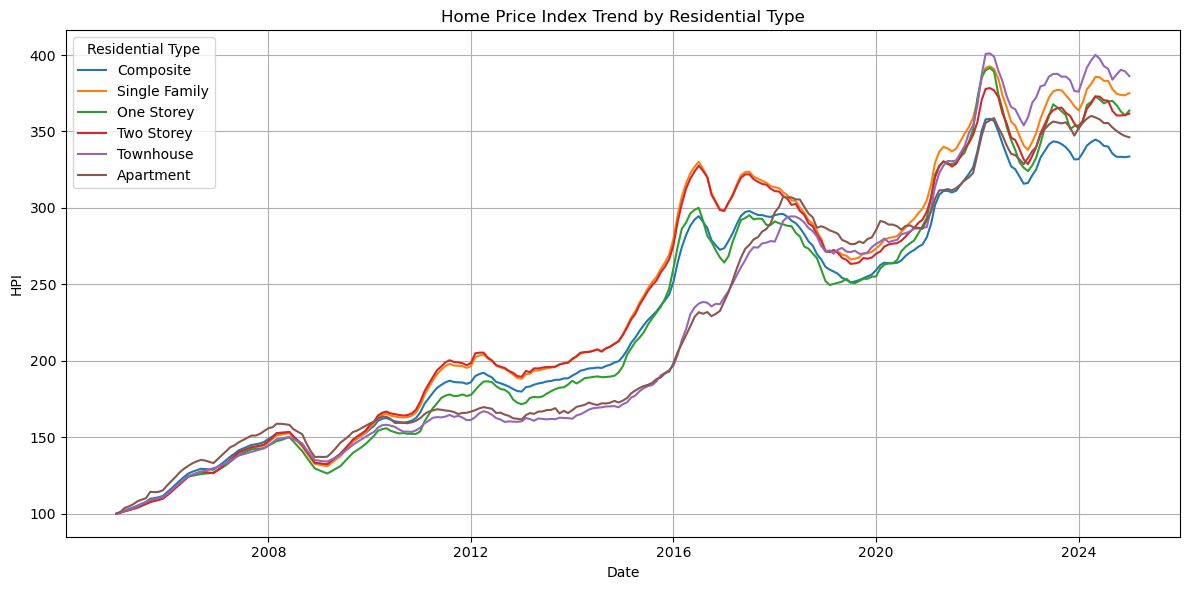

In [8]:

# Load the dataset
df = pd.read_csv("../cleaned_data/cleaned_not_seasonality_adjust.csv")  # Replace with actual filename

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Plot selected HPI columns over time
plt.figure(figsize=(12, 6))
hpi_columns = ['Composite_HPI', 'Single_Family_HPI', 'One_Storey_HPI', 'Two_Storey_HPI', 'Townhouse_HPI', 'Apartment_HPI']
for col in hpi_columns:
    plt.plot(df['Date'], df[col], label=col.replace("_HPI", "").replace("_", " "))

plt.title("Home Price Index Trend by Residential Type")
plt.xlabel("Date")
plt.ylabel("HPI")
plt.legend(title="Residential Type")
plt.grid(True)
plt.tight_layout()
plt.show()


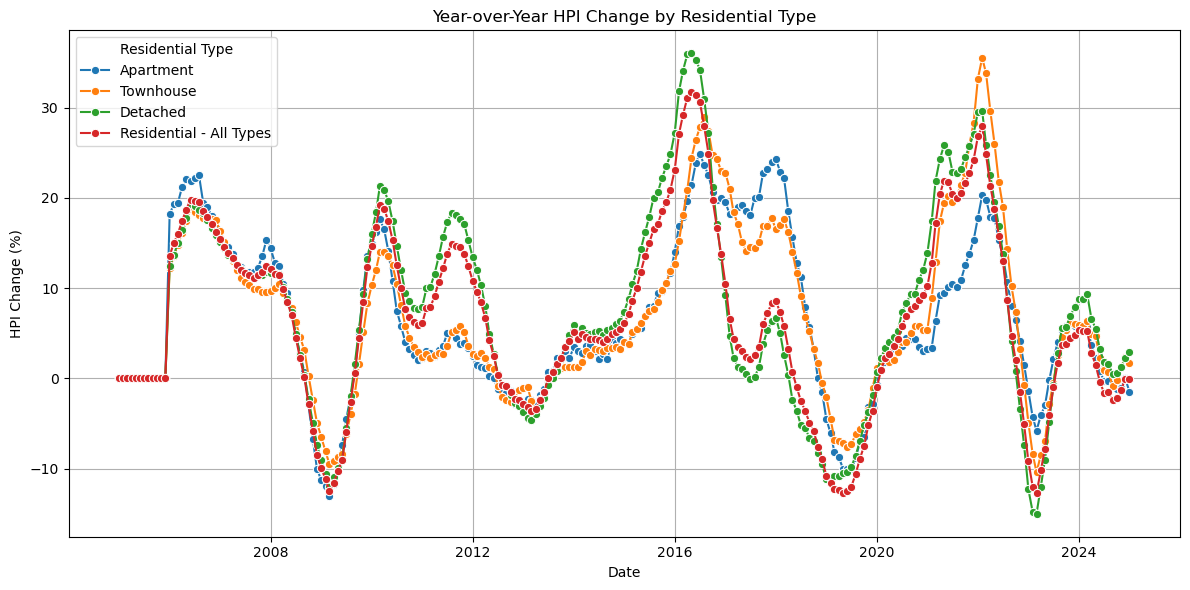

In [9]:
# Load dataset
df = pd.read_csv("../cleaned_data/Cleaned_property_HPI_data.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Convert '1 Year +/-' to numeric (some may have % or be strings)
df['1 Year +/-'] = pd.to_numeric(df['1 Year +/-'], errors='coerce')

# Filter out rows with missing values in that column
df = df.dropna(subset=['1 Year +/-'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='1 Year +/-', hue='Residential Type', marker='o')

plt.title("Year-over-Year HPI Change by Residential Type")
plt.xlabel("Date")
plt.ylabel("HPI Change (%)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Residential Type")
plt.show()


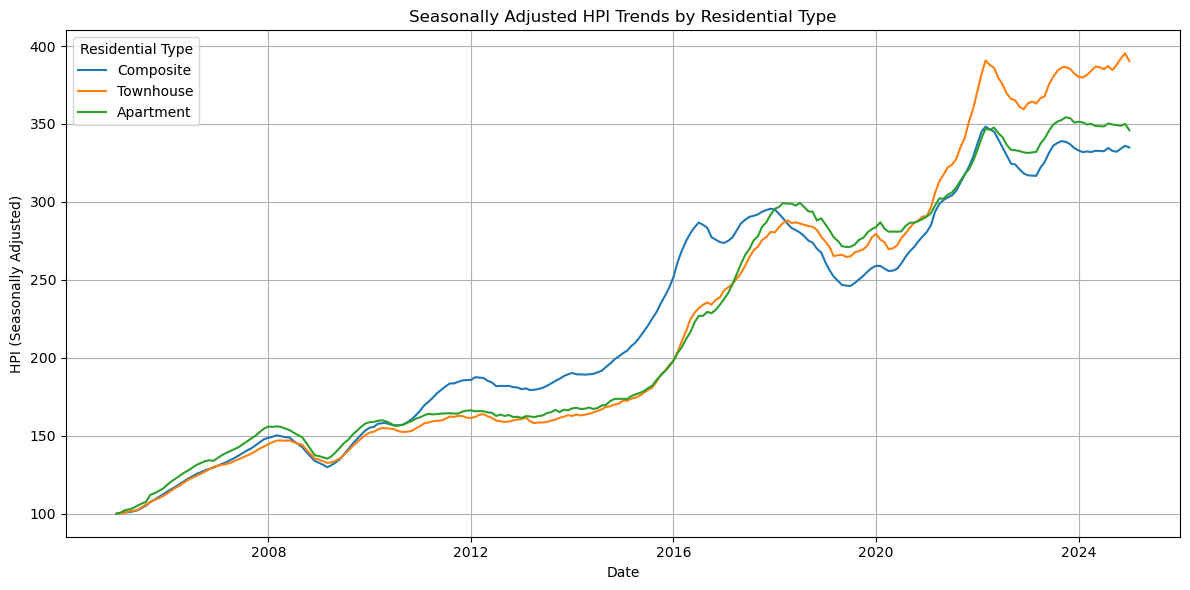

In [10]:
# Load data
df = pd.read_csv("../cleaned_data/cleaned_seasonality_adjust.csv")

# Convert date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Plot selected HPI columns
plt.figure(figsize=(12, 6))
hpi_cols = ['Composite_HPI_SA', 'Townhouse_HPI_SA', 'Apartment_HPI_SA']
for col in hpi_cols:
    plt.plot(df['Date'], df[col], label=col.replace('_HPI_SA', '').replace('_', ' '))

plt.title("Seasonally Adjusted HPI Trends by Residential Type")
plt.xlabel("Date")
plt.ylabel("HPI (Seasonally Adjusted)")
plt.legend(title="Residential Type")
plt.grid(True)
plt.tight_layout()
plt.show()

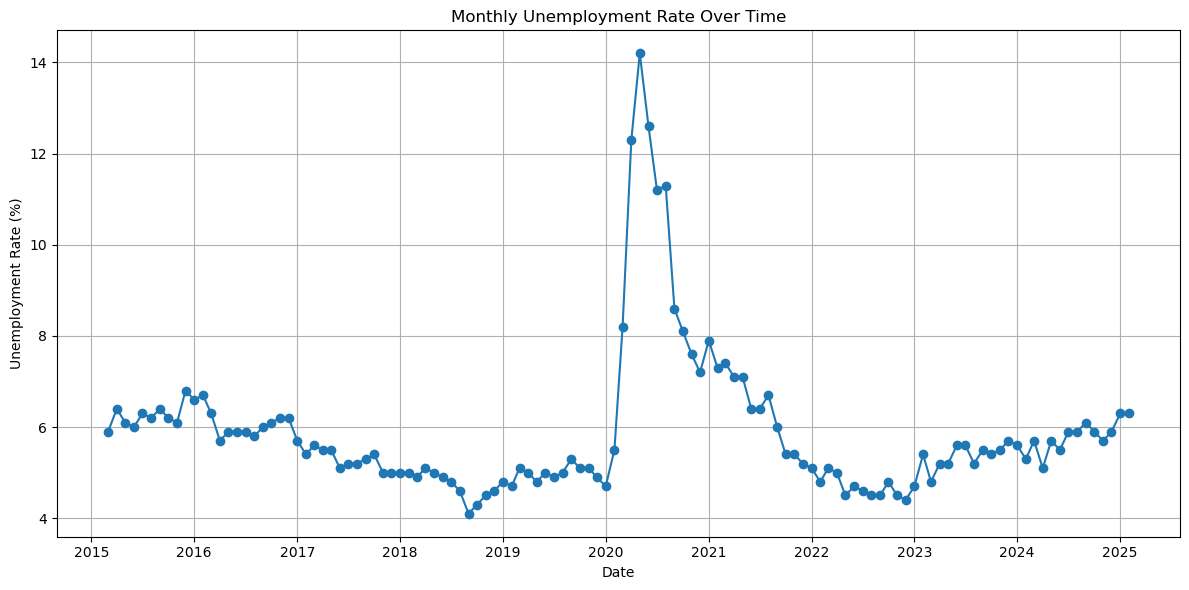

In [11]:
# Load the dataset
df = pd.read_csv("../cleaned_data/cleaned_unemployment.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Unemployment_rate'], marker='o', linestyle='-')

plt.title("Monthly Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

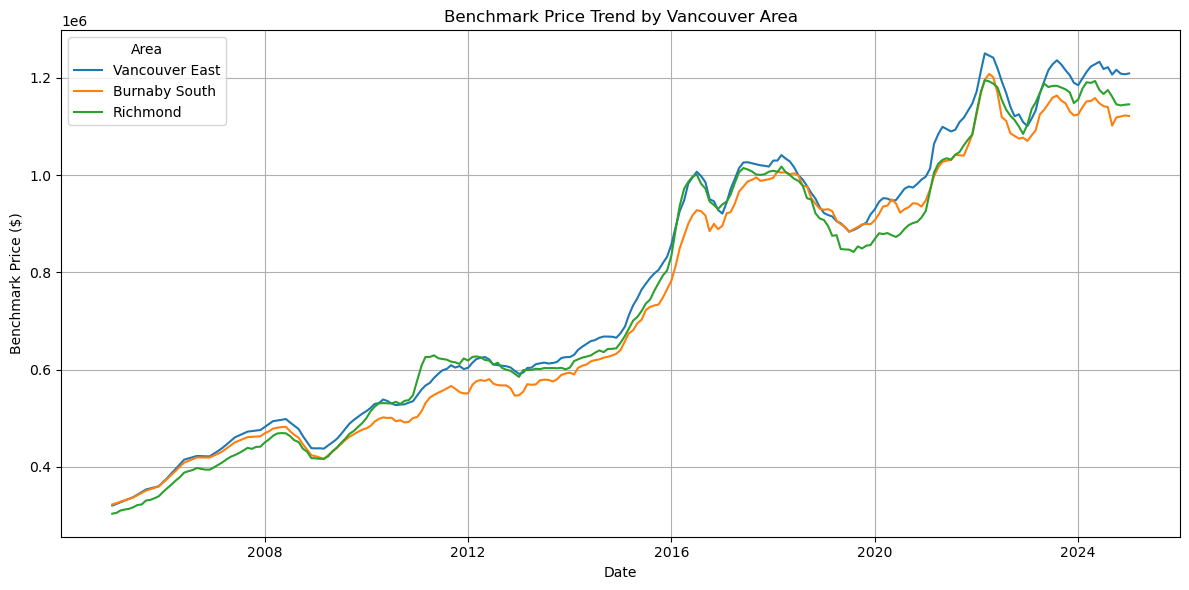

In [12]:
# Load dataset
df = pd.read_csv("../cleaned_data/cleaned_vancouver_areas_property_data.csv")

# Clean 'Benchmark' column
df['Benchmark'] = df['Benchmark'].replace('[\$,]', '', regex=True).astype(float)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Filter a few example areas for clearer plot (optional)
selected_areas = ['Vancouver East', 'Burnaby South', 'Richmond']
df_filtered = df[df['Area'].isin(selected_areas)]

# Plot
plt.figure(figsize=(12, 6))
for area in selected_areas:
    area_data = df_filtered[df_filtered['Area'] == area]
    plt.plot(area_data['Date'], area_data['Benchmark'], label=area)

plt.title("Benchmark Price Trend by Vancouver Area")
plt.xlabel("Date")
plt.ylabel("Benchmark Price ($)")
plt.legend(title="Area")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
import folium
# Load dataset
df = pd.read_csv("../cleaned_data/filteredPropertyInVancouver.csv")  # Replace with actual filename

# Clean 'Price' column
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Create a base map centered on Vancouver
map_center = [49.25, -123.1]
m = folium.Map(location=map_center, zoom_start=11)

# Add property markers
for _, row in df.iterrows():
    popup_text = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Price:</b> ${row['Price']:,.0f}<br>
    <b>Beds:</b> {row['Beds']} | <b>Baths:</b> {row['Baths']}<br>
    <b>Date:</b> {row['Date']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color="blue", icon="home", prefix='fa')
    ).add_to(m)

# Save the map
m.save("../larry/property_listings_map.html")

C:\Users\Larry\AppData\Local\Temp\ipykernel_54692\1639157427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price Tag', palette='Set2')


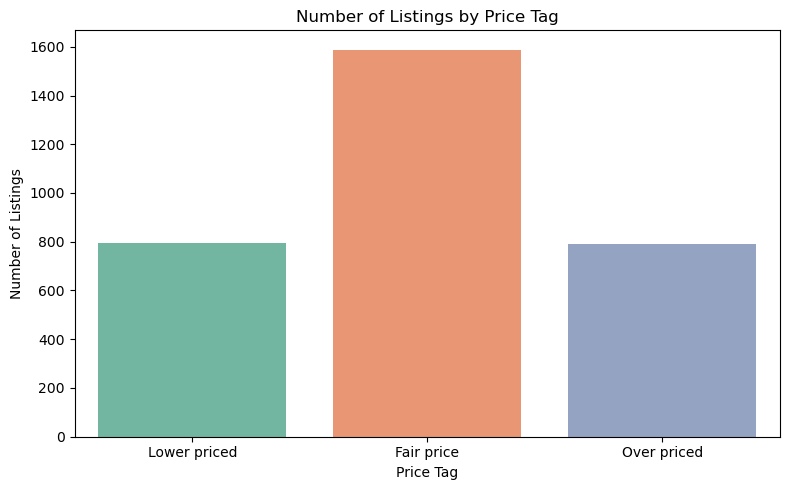

In [3]:
# Load data
df = pd.read_csv("../cleaned_data/filteredPropertyWithPriceTags.csv")

# Plot count of listings by price tag
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Price Tag', palette='Set2')

plt.title("Number of Listings by Price Tag")
plt.xlabel("Price Tag")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()